#### Praxisprojekt: 
## Auto-Datensatz mit Linearer Regression auswerten

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("C:/Users/luco/Desktop/Dokumente/Schule/Python/autos_prepared.csv")

In [63]:
df.head()

,price,yearOfRegistration,powerPS,kilometer,model,fuelType,name
0,1450,1997.0,75.0,90000.0,andere,fuel,Toyota_Toyota_Starlet_1._Hand__TÜV_neu
1,13100,2005.0,280.0,5000.0,golf,fuel,R32_tauschen_oder_kaufen
2,4500,2008.0,87.0,90000.0,yaris,fuel,Toyota_Yaris_1.3_VVT_i
3,6000,2009.0,177.0,125000.0,3er,diesel,320_Alpinweiss_Kohlenstoff
4,3990,1999.0,118.0,90000.0,3er,fuel,BMW_318i_E46_+++_1._Hand_+++_Liebhaberfahrzeug


### Teil 1: Scatter-Plot zeichnen

reihen vor bereinigung: 250
Reihen nach bereinigung: 240
       price  yearOfRegistration  powerPS  kilometer        model fuelType  \
0     1450.0              1997.0     75.0    90000.0       andere     fuel   
1    13100.0              2005.0    280.0     5000.0         golf     fuel   
2     4500.0              2008.0     87.0    90000.0        yaris     fuel   
3     6000.0              2009.0    177.0   125000.0          3er   diesel   
4     3990.0              1999.0    118.0    90000.0          3er     fuel   
5     4400.0              2008.0     71.0    40000.0       fortwo     fuel   
6     1500.0              2005.0     72.0   125000.0       andere      lpg   
7     3999.0              2009.0     61.0    40000.0       fortwo     fuel   
8      640.0              1999.0     69.0   125000.0       andere     fuel   
9     9499.0              2010.0    109.0    80000.0           c4   diesel   
11   11500.0              2009.0    160.0    90000.0     scirocco     fuel   
12   42

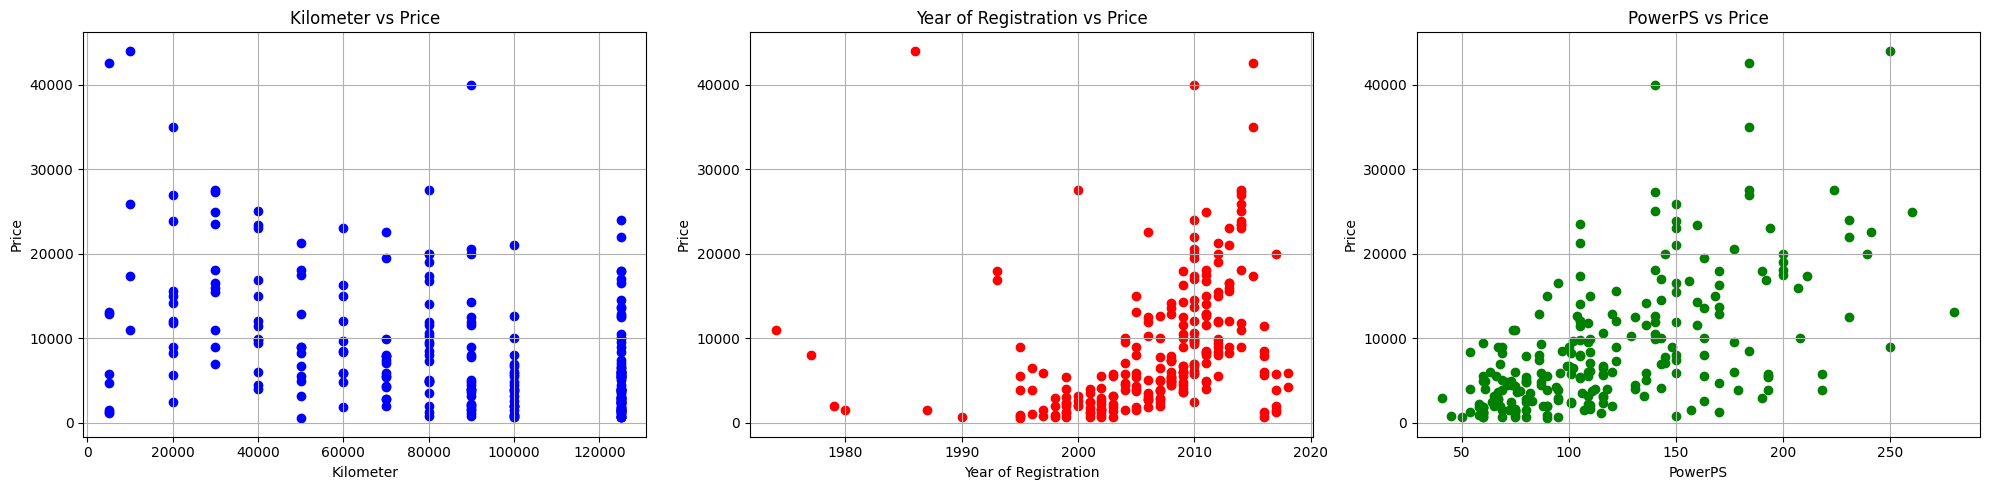

In [64]:

print(f"reihen vor bereinigung: {len(df)}")

# Leere Felder zu NaN
numeric_columns = ["kilometer", "price", "yearOfRegistration", "powerPS"] #, "fuelType", "name" 
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")  

#funktioniert nicht kann weg
'''text_columns = ["fuelType", "model"]
for col in text_columns:
    df[col] = df[col].str.strip'''

text_columns = ["fuelType", "model"]
for col in text_columns:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].replace('', np.nan)

df = df[df['price'] > 300]  #Optionale Bereinigung


df = df.dropna(axis=0)
#df = df.reset_index(drop=True)




#überprüfung was bereinigt wurde
print(f"Reihen nach bereinigung: {len(df)}")

#Alle Reihen der Tabelle werden beim print gezeigt um zu sehen ob es noch unreinheiten gibt
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  
print(df)

#####Plot zeichnen#####

#die Größe des Plots
plt.figure(figsize=(20, 5)) 

# Plot 1: kilometer/price
plt.subplot(131)
plt.scatter(df["kilometer"], df["price"], color='blue', alpha=1)
plt.title("Kilometer vs Price")
plt.xlabel("Kilometer")
plt.ylabel("Price")
plt.grid(True)

# Plot 2: registration/price
plt.subplot(132)
plt.scatter(df["yearOfRegistration"], df["price"], color='red', alpha=1)
plt.title("Year of Registration vs Price")
plt.xlabel("Year of Registration")
plt.ylabel("Price")
plt.grid(True)

# Plot 3: ps/price
plt.subplot(133)
plt.scatter(df["powerPS"], df["price"], color='green', alpha=1)
plt.title("PowerPS vs Price")
plt.xlabel("PowerPS")
plt.ylabel("Price")
plt.grid(True)

#sehen besser aus mit tightlayout. consistency is the key
plt.tight_layout()
plt.show()



## hier startet das Projekt!!
### Daten für das Training vorbereiten

In [65]:
#leere zeilen aussortieren
#ggf wenn fuel oder so in der beschreibung den string in das passende feld einfügen

### Daten in Trainings- und Testdaten aufteilen

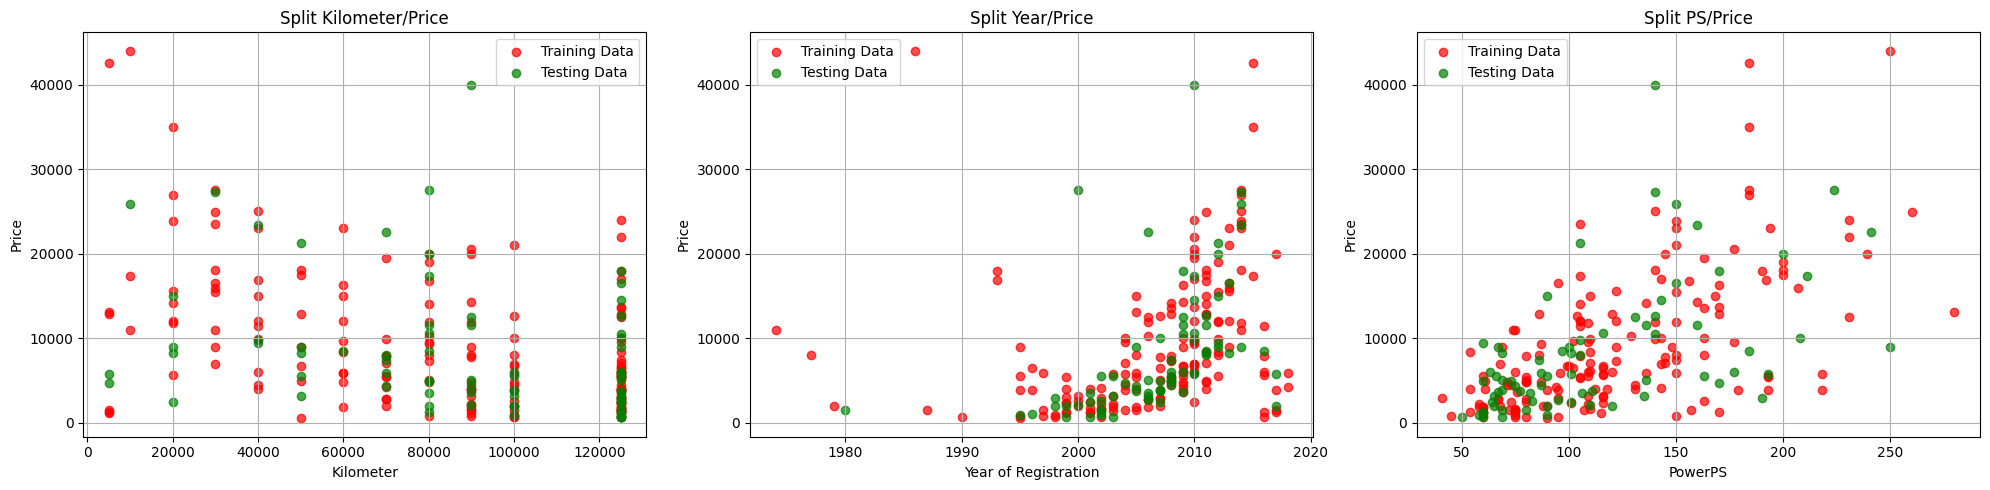

In [66]:

X = df[['kilometer', 'yearOfRegistration', 'powerPS']]
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

plt.figure(figsize=(20, 5))  

# Plot 1: Kilometer vs Price
plt.subplot(131)
plt.scatter(X_train['kilometer'], y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(X_test['kilometer'], y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.xlabel("Kilometer")
plt.ylabel("Price")
plt.title("Split Kilometer/Price")
plt.grid(True)

# Plot 2: Year of Registration vs Price
plt.subplot(132)
plt.scatter(X_train['yearOfRegistration'], y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(X_test['yearOfRegistration'], y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.xlabel("Year of Registration")
plt.ylabel("Price")
plt.title("Split Year/Price")
plt.grid(True)

# Plot 3: PowerPS vs Price
plt.subplot(133)
plt.scatter(X_train['powerPS'], y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(X_test['powerPS'], y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.xlabel("PowerPS")
plt.ylabel("Price")
plt.title("Split PS/Price")
plt.grid(True)

plt.tight_layout()
plt.show()


### Lineare Regression anwenden

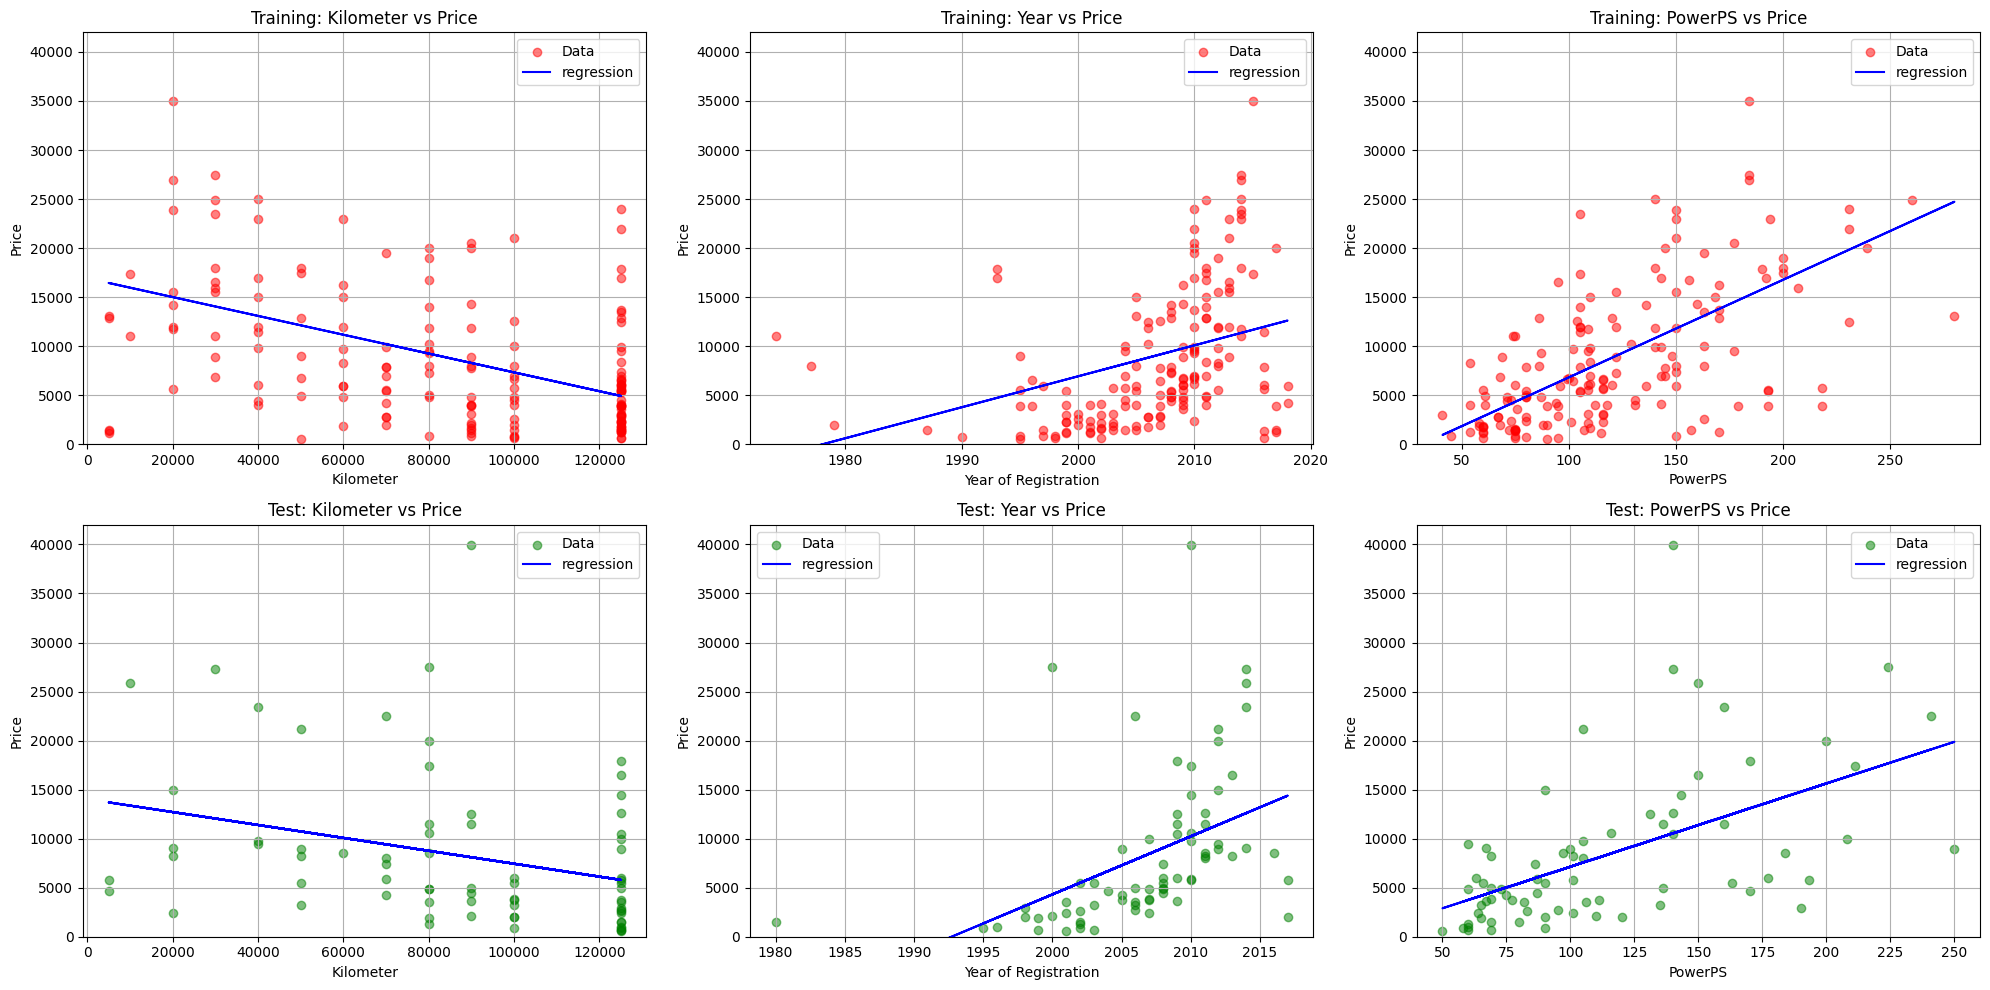

In [67]:
'''from sklearn.linear_model import LinearRegression

plt.figure(figsize=(30, 5))

LR = LinearRegression()
LR.fit (X_train.values.reshape(-1,1),y_train.values)

prediction = LR.predict(X_test.values.reshape(-1,1))

plt.subplot(151)
X_train, X_test, y_train, y_test = train_test_split(df.kilometer, df.price)
plt.scatter(X_train, y_train, label='Training Data', color='r', alpha=.7)
#plt.scatter(X_test, y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.xlabel("Kilometer")
plt.ylabel("Price")
plt.title("Split kilometer/Price")
plt.grid(True)
plt.show()
'''

def plot_linear_regression(X, y, xlabel, ylabel, title, subplot_position, color):

    #Zu 2 Dimensionalen Array
    X = np.array(X).reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)

    #nimmt das model und macht voraussagen basierend auf den daten von x
    predictions = model.predict(X)

    #subplot position
    plt.subplot(subplot_position)
    plt.scatter(X, y, label='Data', color=color, alpha=0.5)
    plt.plot(X, predictions, label='regression', color='b')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 42000)
    

plt.figure(figsize=(20, 10))

# Training data plots
plot_linear_regression(
    X_train["kilometer"], y_train,
    xlabel="Kilometer", ylabel="Price",
    title="Training: Kilometer vs Price", subplot_position=231, color='r'
)

plot_linear_regression(
    X_train["yearOfRegistration"], y_train,
    xlabel="Year of Registration", ylabel="Price",
    title="Training: Year vs Price", subplot_position=232, color='r'
)

plot_linear_regression(
    X_train["powerPS"], y_train,
    xlabel="PowerPS", ylabel="Price",
    title="Training: PowerPS vs Price", subplot_position=233, color='r'
)

# Test data plots
plot_linear_regression(
    X_test["kilometer"], y_test,
    xlabel="Kilometer", ylabel="Price",
    title="Test: Kilometer vs Price", subplot_position=234, color='g'
)

plot_linear_regression(
    X_test["yearOfRegistration"], y_test,
    xlabel="Year of Registration", ylabel="Price",
    title="Test: Year vs Price", subplot_position=235, color='g'
)

plot_linear_regression(
    X_test["powerPS"], y_test,
    xlabel="PowerPS", ylabel="Price",
    title="Test: PowerPS vs Price", subplot_position=236, color='g'
)

plt.tight_layout()
plt.show()


### Was kosten folgende Autos
- Diesel aus dem Jahr 2008 mit 150PS und 80000km 
- Hybrid aus dem Jahr 2013 mit 220PSund 50000km

Predicted price for Car 1 (Year: 2008, PowerPS: 150, Kilometer: 80000): 12094.40
Predicted price for Car 2 (Year: 2013, PowerPS: 220, Kilometer: 50000): 21542.17


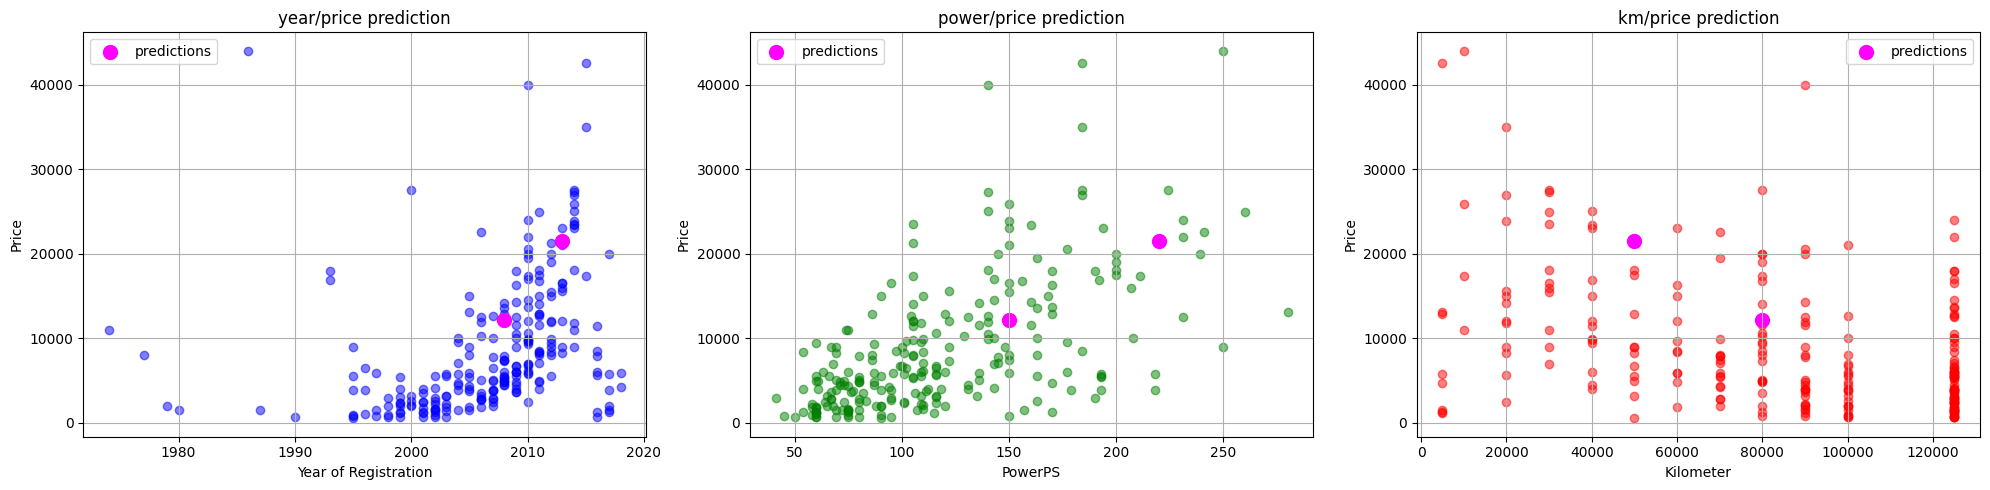

In [68]:
#das hier macht dinge
# nur chatgpt weiß was da gekocht wurde das ist etwas drüber aber ich versuche mein glück es zu beschreiben

def predict_price( model, kilometer, year, powerPS):
    features = pd.DataFrame([[kilometer, year, powerPS]], 
                            columns=['kilometer', 'yearOfRegistration', 'powerPS'])
    return model.predict(features)[0]

# trainiert das model mit allen vorhandenen daten
full_model = LinearRegression()
full_model.fit(X, y)

# macht ein Array mit den Daten für die autos
car1 = {"year": 2008, "powerPS": 150, "kilometer": 80000}
car2 = {"year": 2013, "powerPS": 220, "kilometer": 50000}

# ruft die predict_price funktion ab und speichert den wert in die predict price variable
price_car1 = predict_price(full_model, car1["kilometer"], car1["year"], car1["powerPS"])
price_car2 = predict_price(full_model, car2["kilometer"], car2["year"], car2["powerPS"])

#printet den predicted preis
print(f"Predicted price for Car 1 (Year: {car1['year']}, PowerPS: {car1['powerPS']}, Kilometer: {car1['kilometer']}): {price_car1:.2f}")
print(f"Predicted price for Car 2 (Year: {car2['year']}, PowerPS: {car2['powerPS']}, Kilometer: {car2['kilometer']}): {price_car2:.2f}")


plt.figure(figsize=(20, 5))

# Plot 1: year/price
plt.subplot(131)
plt.scatter(X["yearOfRegistration"], y, color='b', alpha=0.5)
plt.scatter([car1["year"], car2["year"]], [price_car1, price_car2], color='magenta', s=100, label='predictions')
plt.xlabel("Year of Registration")
plt.ylabel("Price")
plt.title("year/price prediction")
plt.legend()
plt.grid(True)

# Plot 2: power/price
plt.subplot(132)
plt.scatter(X["powerPS"], y, color='g', alpha=0.5)
plt.scatter([car1["powerPS"], car2["powerPS"]], [price_car1, price_car2], color='magenta', s=100, label='predictions')
plt.xlabel("PowerPS")
plt.ylabel("Price")
plt.title("power/price prediction")
plt.legend()
plt.grid(True)

# Plot 3: km/price
plt.subplot(133)
plt.scatter(X["kilometer"], y, color='r', alpha=0.5)
plt.scatter([car1["kilometer"], car2["kilometer"]], [price_car1, price_car2], color='magenta', s=100, label='predictions')
plt.xlabel("Kilometer")
plt.ylabel("Price")
plt.title("km/price prediction")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
